In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Генерация данных

Первый класс

In [30]:
np.random.seed(7)
data_train = np.random.normal(size=(100, 2))
labels_train = np.zeros(100)

Второй класс

In [31]:
data_train = np.r_[data_train, np.random.normal(size=(100, 2), loc=2)]
labels_train = np.r_[labels_train, np.ones(100)]

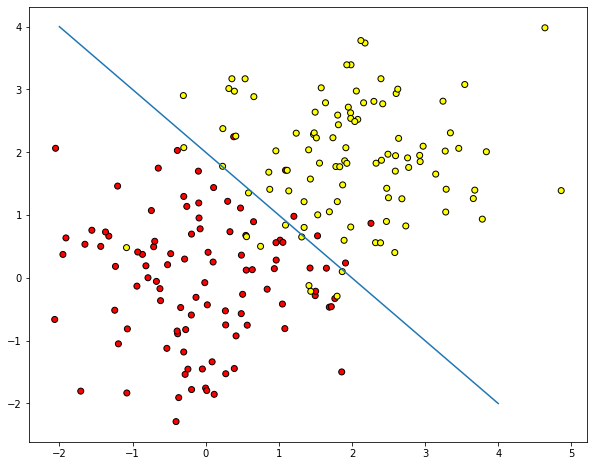

In [32]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(data_train[:, 0], data_train[:, 1], c=labels_train, cmap='autumn', edgecolors='black')
plt.plot(range(-2, 5), range(4, -3, -1))

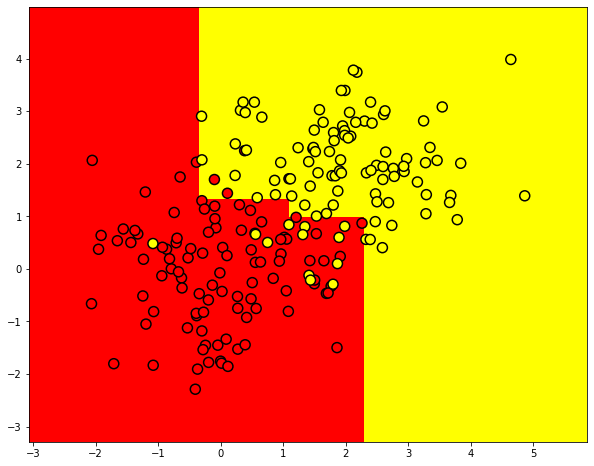

In [33]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_tree.fit(data_train, labels_train)
xx, yy = get_grid(data_train)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(data_train[:, 0], data_train[:, 1], c=labels_train, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

[Text(321.9230769230769, 380.52, 'X[0] <= 1.103\nentropy = 1.0\nsamples = 200\nvalue = [100, 100]'),
 Text(171.69230769230768, 271.8, 'X[1] <= 1.325\nentropy = 0.657\nsamples = 106\nvalue = [88, 18]'),
 Text(85.84615384615384, 163.07999999999998, 'X[1] <= 0.447\nentropy = 0.276\nsamples = 84\nvalue = [80, 4]'),
 Text(42.92307692307692, 54.360000000000014, 'entropy = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(128.76923076923077, 54.360000000000014, 'entropy = 0.605\nsamples = 27\nvalue = [23, 4]'),
 Text(257.53846153846155, 163.07999999999998, 'X[0] <= -0.346\nentropy = 0.946\nsamples = 22\nvalue = [8, 14]'),
 Text(214.61538461538458, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(300.46153846153845, 54.360000000000014, 'entropy = 0.764\nsamples = 18\nvalue = [4, 14]'),
 Text(472.15384615384613, 271.8, 'X[1] <= 0.992\nentropy = 0.551\nsamples = 94\nvalue = [12, 82]'),
 Text(429.23076923076917, 163.07999999999998, 'X[0] <= 2.291\nentropy = 0.996\nsamples = 26\n

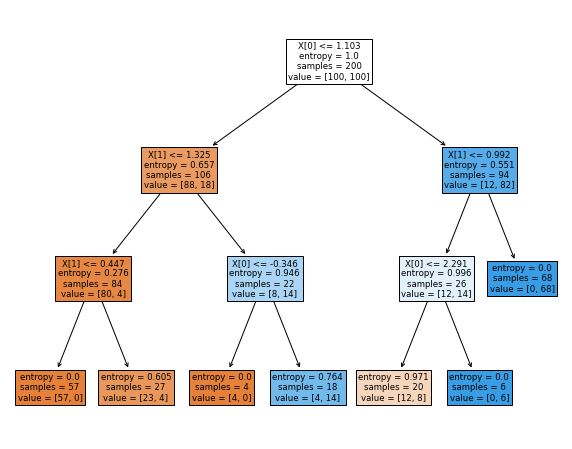

In [37]:
plot_tree(clf_tree, filled=True)

## Как дерево решений работает с количественными признаками

In [44]:
cont_data_df = pd.DataFrame(np.array([[17,18,20,25,29,31,33,38,49,55,64],
                        [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]]).T,
                       columns=['age', 'credit_return'])
cont_data_df

,age,credit_return
0,17,1
1,18,1
2,20,0
3,25,1
4,29,1
5,31,0
6,33,1
7,38,1
8,49,0
9,55,0


[Text(239.1428571428571, 398.64, 'X[0] <= 43.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(159.42857142857142, 326.15999999999997, 'X[0] <= 19.0\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(79.71428571428571, 253.67999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(239.1428571428571, 253.67999999999998, 'X[0] <= 22.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(159.42857142857142, 181.2, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(318.85714285714283, 181.2, 'X[0] <= 30.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(239.1428571428571, 108.71999999999997, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(398.57142857142856, 108.71999999999997, 'X[0] <= 32.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(318.85714285714283, 36.23999999999995, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(478.2857142857142, 36.23999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(318.85714285714283, 326.15999999999997, 'gini = 0.0\nsample

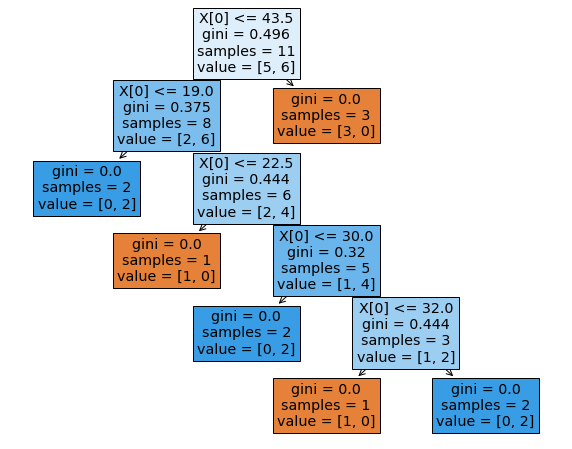

In [48]:
from sklearn.tree import DecisionTreeRegressor

data = cont_data_df['age']
labels = cont_data_df['credit_return']

cont_clf_tree = DecisionTreeClassifier(random_state=42)
cont_clf_tree.fit(np.array(data).reshape(-1, 1), np.array(labels).reshape(-1, 1))
plot_tree(cont_clf_tree, filled=True)

Рассмотрим пример посложнее: добавим признак "Зарплата" (тыс. рублей/месяц).

In [50]:
cont_data_df['salary'] = pd.Series([25, 22, 36, 70, 33, 102, 88, 37, 59, 74, 80])
cont_data_df

,age,credit_return,salary
0,17,1,25
1,18,1,22
2,20,0,36
3,25,1,70
4,29,1,33
5,31,0,102
6,33,1,88
7,38,1,37
8,49,0,59
9,55,0,74


[Text(398.57142857142856, 391.392, 'X[0] <= 43.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(318.85714285714283, 304.416, 'X[1] <= 95.0\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(239.1428571428571, 217.44, 'X[0] <= 22.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(159.42857142857142, 130.464, 'X[0] <= 19.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(79.71428571428571, 43.488, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(239.1428571428571, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(318.85714285714283, 130.464, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(398.57142857142856, 217.44, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(478.2857142857142, 304.416, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

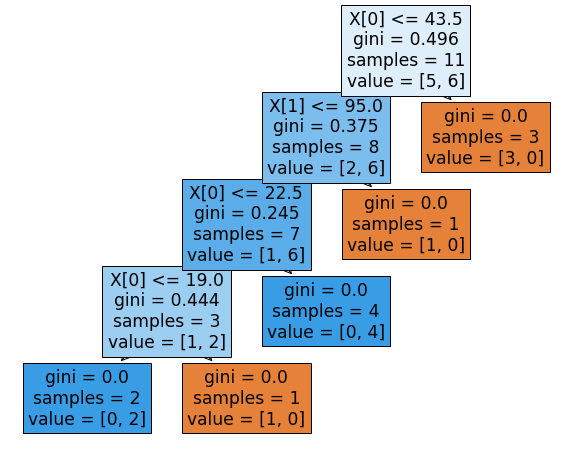

In [51]:
cont_clf_tree = DecisionTreeClassifier(random_state=42)
cont_clf_tree.fit(cont_data_df[['age', 'salary']], cont_data_df['credit_return'])
plot_tree(cont_clf_tree, filled=True)

## Дерево решений в задаче регрессии

Минимизируется дисперсия в листе

(-5, 5)

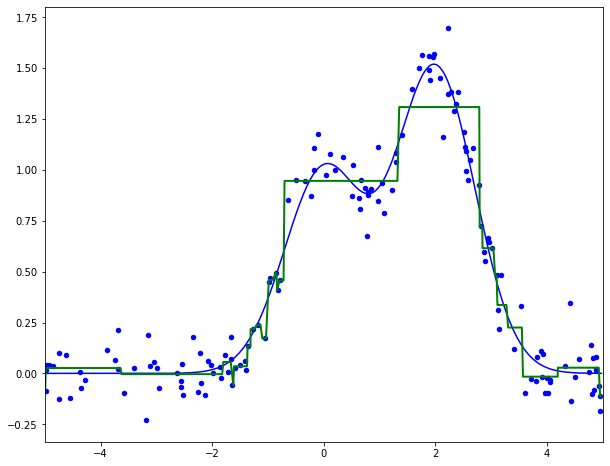

In [56]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape(n_samples, 1)
    return X, y

X_train, y_train = generate(n_train, noise)
X_test, y_test = generate(n_test, noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_tree.fit(X_train, y_train)

predictions = reg_tree.predict(X_test)
plt.plot(X_test, f(X_test), 'b')
plt.scatter(X_train, y_train, c='b', s=20)
plt.plot(X_test, predictions, 'g', lw=2)
plt.xlim([-5, 5])

## Метод ближайших соседей

In [57]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

clf_knn = KNeighborsClassifier()
clf_knn.fit(cont_data_df[['age', 'salary']], cont_data_df['credit_return'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

(-5, 5)

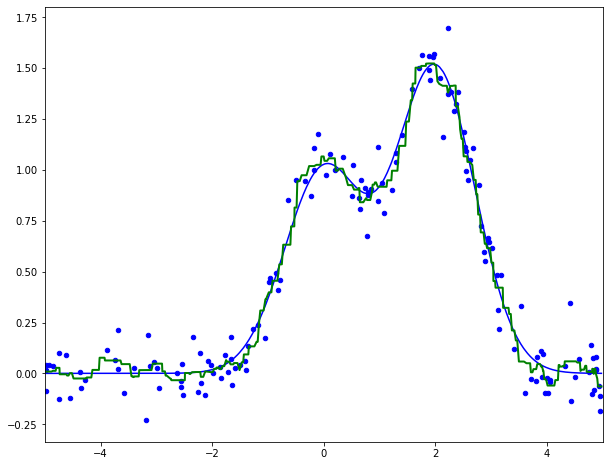

In [58]:
reg_knn = KNeighborsRegressor()
reg_knn.fit(X_train, y_train)

predictions = reg_knn.predict(X_test)
plt.plot(X_test, f(X_test), 'b')
plt.scatter(X_train, y_train, c='b', s=20)
plt.plot(X_test, predictions, 'g', lw=2)
plt.xlim([-5, 5])

## Выбор параметров модели и кросс-валидация

Деревья решений и метод ближайших соседей в задаче прогнозирования оттока клиентов телеком-оператора

In [64]:
df = pd.read_csv('telecom_churn.csv')

df['international plan'] = pd.factorize(df['international plan'])[0]
df['voice mail plan'] = pd.factorize(df['voice mail plan'])[0]
df['churn'] = df['churn'].astype('int')
states = df['state']
y = df['churn']
df.drop(['state', 'churn', 'phone number'], axis=1, inplace=True)
df

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

tree_predictions = tree.predict(X_test)
print(accuracy_score(y_test, tree_predictions))

knn_predictions = knn.predict(X_test)
print(accuracy_score(y_test, knn_predictions))

0.934
0.87


Настроим параметры на кросс-валидации для дерева

In [67]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1, 11),
              'max_features': range(4, 10)}

tree = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1)
tree_grid.fit(X_train, y_train)
print(tree_grid.best_params_)
print(tree_grid.best_score_)

{'max_depth': 8, 'max_features': 9}
0.9348478354050579


KNN с использованием Pipeline

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=6, n_jobs=-1)
knn_grid.fit(X_train, y_train)

print(knn_grid.best_params_)
print(knn_grid.best_score_)

{'knn__n_neighbors': 3}
0.8894127732533219


In [74]:
print(accuracy_score(y_test, knn_grid.predict(X_test)))

0.887


## Случайный лес

In [76]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

forest_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

forest_grid = GridSearchCV(forest, forest_params,
cv=5, n_jobs=-1,
verbose=True)

forest_grid.fit(X_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ # ({'max_depth': 9, 'max_features': 6}, 0.951)

accuracy_score(y_holdout, forest_grid.predict(X_holdout)) # 0.953

c:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


0.9455743225118564
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   60.0s finished


NameError: name 'y_holdout' is not defined